# Test smolagents for multiagent RAG

[https://huggingface.co/learn/cookbook/multiagent_rag_system](https://huggingface.co/learn/cookbook/multiagent_rag_system)

In [2]:
!pip install -q smolagents

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.7/72.7 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 MB 22.8 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.4/321.4 kB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 75.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.7/81.7 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 22.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 78.3 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that a

In [3]:
!pip install markdownify duckduckgo-search spaces gradio-tools langchain langchain-community langchain-huggingface faiss-cpu --upgrade -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 59.1 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.5/27.5 MB 45.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.9/411.9 kB 23.7 MB/s eta 0:00:00


In [4]:
from huggingface_hub import notebook_login

notebook_login()

In [5]:
from smolagents import HfApiModel

model_id = "Qwen/Qwen2.5-72B-Instruct"
model = HfApiModel(model_id)

We will have 3 agents managed by a central one (refer to the image for details):

🕵💬 Web search agent: It will include the DuckDuckGoSearchTool tool and the VisitWebpageTool. As you can see, each agent may contain a list of tools.
🕵💬 Retriever agent: It will include two tools for retrieving information from two different knowledge bases.
🕵💬 Image generation agent: It will include a prompt generator tool in addition to the image generation tool.
💡 In addition to these agents, the central/orchestrator agent will also have access to the code interpreter tool to execute code.

# Web search agent

The Web search agent will utilize the DuckDuckGoSearchTool to search the web and gather relevant information. This tool acts as a search engine, querying for results based on the specified keywords.

To make the search results actionable, we also need the agent to access the web pages retrieved by DuckDuckGo. That can be achieved by using the built-in VisitWebpageTool.

Let’s explore how to set it up and integrate it into our system!

The following code comes from the original Have several agents collaborate in a multi-agent hierarchy 🤖🤝🤖 recipe, so refer to it for more details.

In [6]:
from smolagents import CodeAgent, ToolCallingAgent, ManagedAgent, DuckDuckGoSearchTool, VisitWebpageTool

web_agent = ToolCallingAgent(tools=[DuckDuckGoSearchTool(), VisitWebpageTool()], model=model)

**Now that we have our first agent, let’s wrap it as a ManagedAgent so the central agent can use it.**

In [7]:
managed_web_agent = ManagedAgent(
    agent=web_agent,
    name="search_agent",
    description="Runs web searches for you. Give it your query as an argument.",
)

# I SKIPPED THE RETRIEVER AGENTS TO AVOID Faiss time and also the Github loging for the issues getter

---

# 2.3 Image generation agent 🎨

The third agent in our system is the Image generation agent. This agent will have two tools: one for refining the user query and another for generating the image based on the query. In this case, we will use the CodeAgent instead of a ReactAgent since the set of actions can be executed in one shot.

You can find more details about the image generation agent in the Agents, supercharged - Multi-agents, External tools, and more documentation.

Let’s dive into how these tools will work together to generate images based on user input!

In [9]:
from smolagents import Tool

In [10]:
from transformers import load_tool, CodeAgent

prompt_generator_tool = Tool.from_space(
    "sergiopaniego/Promptist", name="generator_tool", description="Optimizes user input into model-preferred prompts"
)

Loaded as API: https://sergiopaniego-promptist.hf.space ✔


# modified code to copy previous notebook, since got Llama 3.1 access error when following cookbook !??!

In [17]:
from smolagents import load_tool, CodeAgent, HfApiModel, DuckDuckGoSearchTool

image_generation_tool = load_tool("m-ric/text-to-image", trust_remote_code=True)

model = HfApiModel("Qwen/Qwen2.5-72B-Instruct")

image_generation_agent = CodeAgent(tools=[prompt_generator_tool, image_generation_tool], model=model)


TOOL CODE:
 from smolagents import Tool
from huggingface_hub import InferenceClient


class TextToImageTool(Tool):
    description = "This tool creates an image according to a prompt, which is a text description."
    name = "image_generator"
    inputs = {"prompt": {"type": "string", "description": "The image generator prompt. Don't hesitate to add details in the prompt to make the image look better, like 'high-res, photorealistic', etc."}}
    output_type = "image"
    model_sdxl = "black-forest-labs/FLUX.1-schnell"
    client = InferenceClient(model_sdxl)


    def forward(self, prompt):
        return self.client.text_to_image(prompt)



In [18]:
managed_image_generation_agent = ManagedAgent(
    agent=image_generation_agent,
    name="image_generation_agent",
    description="Generates images from text prompts. Give it your prompt as an argument.",
    additional_prompting="\n\nYour final answer MUST BE only the generated image location.",
)

# 3. Let’s add the general agent manager to orchestrate the system

The central agent manager will coordinate tasks between the agents. It will:

Receive user input and decide which agent (Web search, Retriever, Image generation) handles it.
Delegate tasks to the appropriate agent based on the user’s query.
Collect and synthesize results from the agents.
Return the final output to the user.
We include all the agents we’ve developed as managed_agents and add any necessary imports for the code executor under additional_authorized_imports.

**NOTE I ONLY HAVE 2 RATHER THAN 3 SINCE I DIDNT INCLUDE THE RETRIEVER TOOLS/AGENT**

In [19]:
manager_agent = CodeAgent(
    tools=[],
    model=model,
    #managed_agents=[managed_web_agent, managed_retriever_agent, managed_image_generation_agent],
    managed_agents=[managed_web_agent, managed_image_generation_agent],
    additional_authorized_imports=["time", "datetime", "PIL"],
)

Now that everything is set up, let’s test the performance of the multi-agent RAG system!

To do so, we’ll provide some example queries and observe how the system delegates tasks between the agents, processes the information, and returns the final results.

This will help us understand the efficiency and effectiveness of our agents working together, and identify areas for optimization if necessary.

Let’s go ahead and run some tests!

## 3.1 Example trying to trigger the search agent

In [20]:
manager_agent.run("How many years ago was Stripe founded?")


╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ How many years ago was Stripe founded?                                                                          │
│                                                                                                                 │
╰─ HfApiModel - Qwen/Qwen2.5-72B-Instruct ────────────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 0 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing this code: ────────────────────────────────────────────────────────────────────────────────────────── 
  founding_year = search_agent(request="What is the founding year of Stripe?")                                     
  print(founding_year)                                                                                             
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ You're a helpful agent named 'search_agent'.                                                                    │
│ You have been submitted this task by your manager.                                                              │
│ ---                                                                                                             │
│ Task:                                                                                                           │
│ What is the founding year of Stripe?                                                                            │
│ ---                                                                                                             │
│ You're helping your manager solve a wider task: so make sure to not provide a one-line answer, but give as much │
│ information as possible to give them a clear understanding of the answer.                                       │
│                                                                                                                 │
│ Your final_answer WILL HAVE to contain these parts:                                                             │
│ ### 1. Task outcome (short version):                                                                            │
│ ### 2. Task outcome (extremely detailed version):                                                               │
│ ### 3. Additional context (if relevant):                                                                        │
│                                                                                                                 │
│ Put all these in your final_answer tool, everything that you do not pass as an argument to final_answer will be │
│ lost.                                                                                                           │
│ And even if your task resolution is not successful, please return as much context as possible, so that your     │
│ manager can act upon this feedback.                                                                             │
│ {additional_prompting}                                                                                          │
│                                                                                                                 │
╰─ HfApiModel - Qwen/Qwen2.5-72B-Instruct ────────────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 0 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ Calling tool: 'web_search' with arguments: {'query': 'founding year of Stripe'}                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Observations: ## Search Results

|Stripe, Inc. - Wikipedia](https://en.wikipedia.org/wiki/Stripe,_Inc.)
Irish entrepreneur brothers John and Patrick Collison founded Stripe in Palo Alto, California, in 2010, |9] and 
serve as the company's president |10] and CEO, |11] respectively. In 2011 the company received a $2 million 
investment, including contributions from Elon Musk, PayPal founder Peter Thiel, Irish entrepreneur Liam Casey, |12]
and venture capital firms Sequoia Capital, Andreessen ...

|The Collison Brothers and Story Behind The Founding Of 
Stripe](https://www.startupgrind.com/blog/the-collison-brothers-and-story-behind-the-founding-of-stripe/)
Clearly Stripe is hitting a chord with developers and other segments desperate for a better solution. When they 
release their traffic and dollars processed totals, people are going to be blown away. Catch the full 2012 
interview below, or see all our live sessions with Patrick Collison of Stripe over 3 years.

|Stripe's Founders: The Story of Collison Brothers - 
KITRUM](https://kitrum.com/blog/stripe-founders-the-story-of-collison-brothers/)
The factors contributing to Stripe's rise in popularity. Back in May 2011, Stripe acquired a $2 million investment 
from a group of venture capitalists, including Peter Thiel, Elon Musk, Sequoia Capital, SV Angel, and Andreessen 
Horowitz. Stripe then launched publicly in September 2011 after a lengthy private beta period.

|History Of Stripe - Medium](https://medium.com/@samuelchima/history-of-stripe-d41879f7b71a)
It was founded in 2010 by brothers Patrick and John Collison while they were attending college in Ireland. Stripe 
first made its appearance on the public scene in 2011. ... Over the years, Stripe ...

|The Collison Brothers: The Story Behind The Founding Of 
Stripe](https://medium.com/startup-grind/the-collison-brothers-the-story-behind-the-founding-of-stripe-ae013434c080
)
In 2012, we updated this piece to reflect Bloomberg's latest report that Stripe had just raised an $18MM round with
Sequoia at a $100MM valuation. On July 28th, 2015 Stripe announced even bigger…

|Stripe History: Founding, Timeline, and Milestones - Zippia](https://www.zippia.com/stripe-careers-39818/history/)
Stripe was founded in 2010 by Irish entrepreneurs Patrick and John Collison. ... A year later, in May of 2011, 
Stripe received a $2 million investment from Sequoia Capital, Peter Thiel and Adreessen Horowtiz. In June of 2011, 
roughly 18-months after the company began, the first designer joined the team and synced the brand and messaging 
which ...

|Building a $95 Billion Startup: The Stripe Story - Wishpond 
Blog](https://blog.wishpond.com/post/115675438299/stripe-startup)
Stripe Background: How Stripe Was Started. Stripe was founded 11 years ago by John and Patrick Collison, aged 19 
and 21 at the time. Hailing from Dromineer, a small town on the shores of Lough Derg in County Tipperary, Ireland, 
both the brothers were academically gifted and showed a special interest in math and physics from a very young age.

|Stripe Company Story - Profile, History, Founder, CEO - SuccessStory](https://successstory.com/companies/stripe)
Stripe was founded in 2010 by Irish entrepreneurs Patrick and John Collison. CEO. Patrick Collison is the current 
CEO (chief executive officer) of Stripe. ... Later that year, Stripe conducted extensive private beta testing 
before announcing their decision to go public. In February of 2012, Stripe received another $18 million investment,
mainly ...

|Stripe - Company Profile - 
Tracxn](https://tracxn.com/d/companies/stripe/__uahG_IGnVgsUsOG-f8otYHLkOkliWg7YFhJ5ZkNIkpI)
Stripe - Payment processing and card issuance solutions for businesses. Raised a total funding of $9.81B over 24 
rounds from 116 investors. Valued at $70B. Founded by Patrick Collison and John Collison in the year 2009. Stripe 
has 1940 competitors.

|Stripe, Inc. - Simple English Wikipedia, the free encyclopedia](https://simple.wikipedia.org/wiki/Stripe,_

[Step 0: Duration 2.33 seconds| Input tokens: 1,544 | Output tokens: 17]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ Calling tool: 'final_answer' with arguments: {'answer': '### 1. Task outcome (short version):"The founding year │
│ of Stripe is 2010."\\'}                                                                                         │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Final answer: ### 1. Task outcome (short version):"The founding year of Stripe is 2010."\

[Step 1: Duration 2.22 seconds| Input tokens: 4,243 | Output tokens: 57]

Execution logs:
### 1. Task outcome (short version):"The founding year of Stripe is 2010."\

Out: None

[Step 0: Duration 8.06 seconds| Input tokens: 2,131 | Output tokens: 60]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing this code: ────────────────────────────────────────────────────────────────────────────────────────── 
  from datetime import datetime                                                                                    
                                                                                                                   
  currentyear = datetime.now().year                                                                                
  number_of_years = currentyear - 2010                                                                             
  final_answer(number_of_years)                                                                                    
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: 15

[Step 1: Duration 3.48 seconds| Input tokens: 4,433 | Output tokens: 132]

15

## 3.2 Example trying to trigger the image generator agent


In [23]:
result = manager_agent.run(
    "Generate a picture of the word Deskin spelled entirely with individual oranges scattered on the floor"
)

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Generate a picture of the word Deskin spelled entirely with individual oranges scattered on the floor           │
│                                                                                                                 │
╰─ HfApiModel - Qwen/Qwen2.5-72B-Instruct ────────────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 0 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing this code: ────────────────────────────────────────────────────────────────────────────────────────── 
  image = image_generation_agent(request="Generate a picture of the word 'Deskin' spelled entirely with            
  individual oranges scattered on the floor")                                                                      
  final_answer(image)                                                                                              
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ You're a helpful agent named 'image_generation_agent'.                                                          │
│ You have been submitted this task by your manager.                                                              │
│ ---                                                                                                             │
│ Task:                                                                                                           │
│ Generate a picture of the word 'Deskin' spelled entirely with individual oranges scattered on the floor         │
│ ---                                                                                                             │
│ You're helping your manager solve a wider task: so make sure to not provide a one-line answer, but give as much │
│ information as possible to give them a clear understanding of the answer.                                       │
│                                                                                                                 │
│ Your final_answer WILL HAVE to contain these parts:                                                             │
│ ### 1. Task outcome (short version):                                                                            │
│ ### 2. Task outcome (extremely detailed version):                                                               │
│ ### 3. Additional context (if relevant):                                                                        │
│                                                                                                                 │
│ Put all these in your final_answer tool, everything that you do not pass as an argument to final_answer will be │
│ lost.                                                                                                           │
│ And even if your task resolution is not successful, please return as much context as possible, so that your     │
│ manager can act upon this feedback.                                                                             │
│ {additional_prompting}                                                                                          │
│                                                                                                                 │
╰─ HfApiModel - Qwen/Qwen2.5-72B-Instruct ────────────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 0 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing this code: ────────────────────────────────────────────────────────────────────────────────────────── 
  image = image_generator(prompt="A picture of the word 'Deskin' spelled entirely with individual oranges          
  scattered on the floor, high-res, photorealistic"                                                                
  print(image)                                                                                                     
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Code execution failed on line 1 due to: SyntaxError
image = image_generator(prompt="A picture of the word 'Deskin' spelled entirely with individual oranges scattered 
on the floor, high-res, photorealistic"                        ^
Error: '(' was never closed (<unknown>, line 1)

[Step 0: Duration 0.03 seconds| Input tokens: 2,310 | Output tokens: 60]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing this code: ────────────────────────────────────────────────────────────────────────────────────────── 
  image = image_generator(prompt="A picture of the word 'Deskin' spelled entirely with individual oranges          
  scattered on the floor, high-res, photorealistic")                                                               
  print(image)                                                                                                     
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x1024 at 0x7ECA3D5AD390>

Out: None

[Step 1: Duration 0.06 seconds| Input tokens: 4,855 | Output tokens: 120]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing this code: ────────────────────────────────────────────────────────────────────────────────────────── 
  image = image_generator(prompt="A picture of the word 'Deskin' spelled entirely with individual oranges          
  scattered on the floor, high-res, photorealistic")                                                               
  final_answer(image)                                                                                              
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x1024 at 0x7ECA3D5AF610>

[Step 2: Duration 6.61 seconds| Input tokens: 7,600 | Output tokens: 200]

Out - Final answer: /tmp/tmpp42hbsvp/77172ba5-9361-4c83-a82f-1a915f1fcdb4.png

[Step 0: Duration 7.09 seconds| Input tokens: 2,745 | Output tokens: 80]

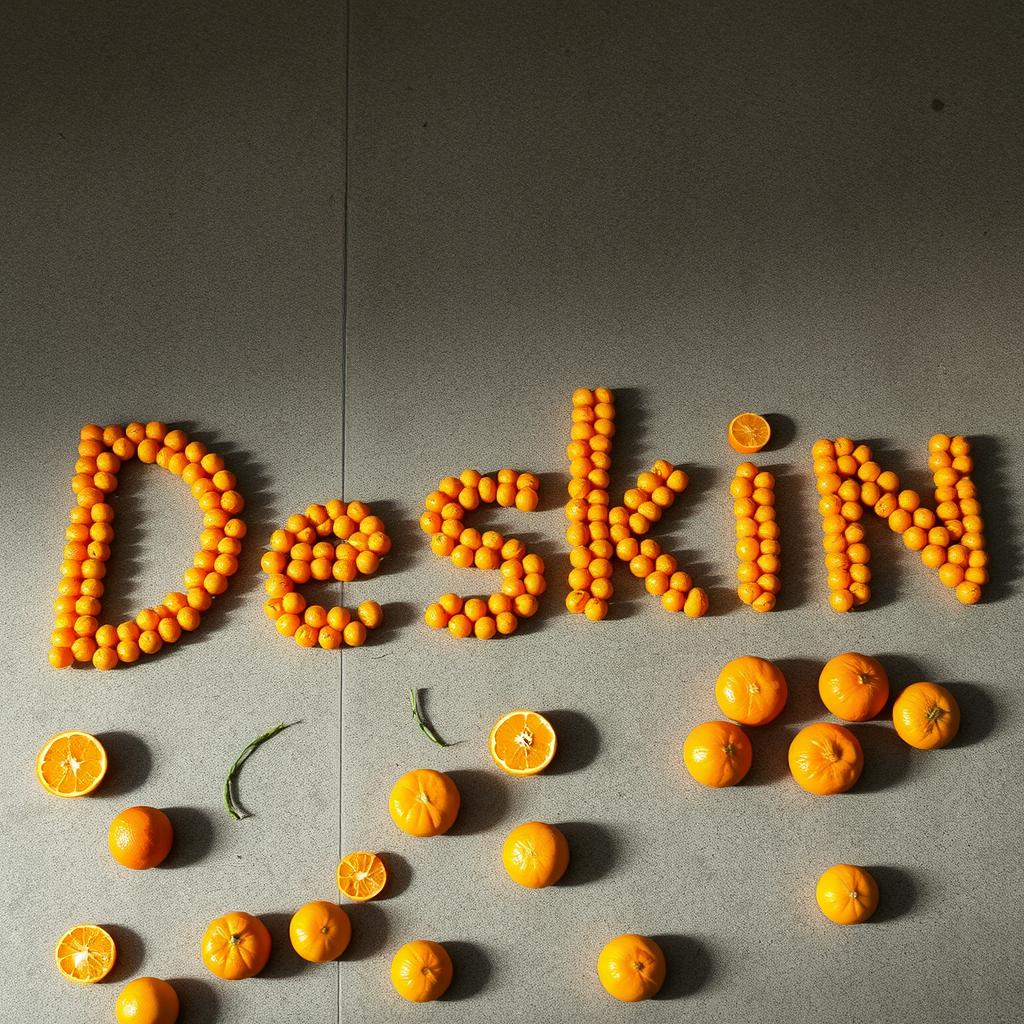

In [25]:
result